In [1]:
# Import the necessary dependecies or libraries/packages for Pandas, Numpy,os, Matplotlib,
# Scikit Learn and Tensorflow

import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import tensorflow as tf

%matplotlib inline

C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Franc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

In [2]:
# Read in the dataset as a DataFrame
 
diabetes_df = pd.read_csv(Path('/users/Test/Resources/diabetes.csv'))
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the shape of the dataset to observe and understand how many datapoints and features
# are present
diabetes_df.shape

(768, 9)

In [4]:
# Separate the features(X) from Target (Y)
# Note that y is the "Outcome" column
# x are all the features without the "Outcome"
# We name the DataFrame "X"

y = diabetes_df["Outcome"]
X = diabetes_df.drop(columns="Outcome")

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
# Find out if there are any missing values in our series of objects in
# the dataset, 0 indicates none
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Find out if there are na/nans in the dataset. 0 inicates none
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Import the scikit learn package for train/test
from sklearn.model_selection import train_test_split

# set data parameters for plotting purposes
np.random.seed(0)
num_data_pts = 768
noise_val = 0.25

# generate data for X and Y
X, Y = make_moons(num_data_pts, noise=noise_val)

# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.25, random_state=42, stratify=y)


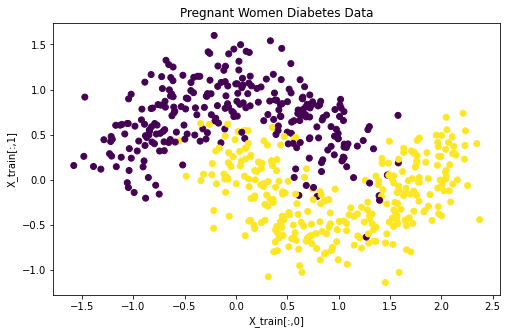

In [8]:
# plot datapoint distribution for both classes. Note that this is a non-linear distribution
# points are colored by class, Y_train
# 0 = purple, 1 = yellow

plt.figure(figsize=(8,5))
plt.xlabel('X_train[:,0]')
plt.ylabel('X_train[:,1]')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Pregnant Women Diabetes Data')
plt.show()


In [44]:
# Get the datapoint splits using the counter function
from collections import Counter

diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({1: 280, 0: 280})

In [31]:
#from sklearn.model_selection import train_test_split

# Remove diabetes outcome target from features data
#y = diabetes_df.Outcome
#X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42, stratify=y)

In [51]:
# Observe the splits for all X_train/X_teat and y_train/y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 2)
(231, 2)
(537,)
(231,)


Text(0.5, 1.0, 'Sigmoid Function ')

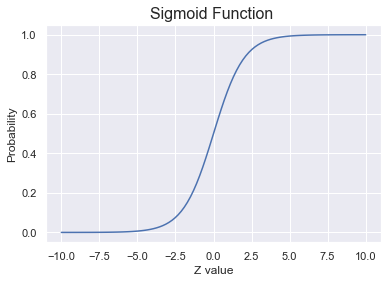

In [17]:
# import the higher level plotting tool package
import seaborn as sns  

# call the Seaborn, a Python data visualization library based on matplotlib.function
sns.set()

z = np.linspace(-10,10,100) # define z (This is also known as "a'x", 

# the area that separates y=0 and y=1)
def g(z) :  # create a python function and define the function for sigmoid or the hypothesis
    return 1/(1 + np.exp(-z))
#plt.plot(x_axis, y_axis)
plt.xlabel('Z value')
plt.ylabel('Probability')
plt.plot(z, g(z))
plt.title("Sigmoid Function ", fontsize=16)

In [52]:
# Preprocess numerical data for neural network. Normalize or standardize 
# our numerical variables to ensure that our neural network does 
# not focus on outliers and can apply proper weights to each input.

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model
logistic_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
logistic_classifier.fit(X_train,y_train)


# Evaluate the model
logistic_classifier.predict(X_test)
predictor = logistic_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,predictor):.3f}")

 Logistic regression model accuracy: 0.805


In [56]:
from sklearn.metrics import accuracy_score
print(f"accuracy_score: {accuracy_score(y_test, predictor): }")
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictor)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

accuracy_score:  0.8051948051948052


In [70]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {accuracy_score}")
print("Classification Report")
print(classification_report(y_test, predictor))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,110,17
Actual 1,11,93


Accuracy Score : <function accuracy_score at 0x000001B23887FC18>
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       127
           1       0.76      0.84      0.79       104

    accuracy                           0.81       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.81      0.81      0.81       231



In [33]:
# Define the basic neural network model

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
576/576 [==============================] - 1s 2ms/sample - loss: 0.8271 - acc: 0.3715
Epoch 2/100
576/576 [==============================] - 0s 45us/sample - loss: 0.7685 - acc: 0.3941
Epoch 3/100
576/576 [==============================] - 0s 38us/sample - loss: 0.7207 - acc: 0.4792
Epoch 4/100
576/576 [==============================] - 0s 43us/sample - loss: 0.6824 - acc: 0.5747
Epoch 5/100
576/576 [==============================] - 0s 40us/sample - loss: 0.6504 - acc: 0.6354
Epoch 6/100
576/576 [==============================] - 0s 45us/sample - loss: 0.6239 - acc: 0.6875
Epoch 7/100
576/576 [==============================] - 0s 46us/sample - loss: 0.6006 - acc: 0.7188
Epoch 8/100
576/576 [==============================] - 0s 33us/sample - loss: 0.5809 - acc: 0.7292
Epoch 9/100
576/576 [==============================] - 0s 47us/sample - loss: 0.5635 - acc: 0.7448
Epoch 10/100
576/576 [==============================] - 0s 36us/sample - loss: 0.5492 - acc: 0.7552
Epoch 11/1

In [58]:
# Evaluate the Logistic Regression trained model on test data for model metrics
# Note: I applied part of the code with modification from some of our projects on SageMaker
# deployed predictor for consolidated metrics output

def evaluate(predictor, test_features, test_labels, verbose=True):
        
    # rounding and squeezing array
    test_preds = 0.01 #np.squeeze(np.round(predictor.predict(test_features)))
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    
    # print metrics
    if verbose:
        print(pd.crosstab(test_labels, test_preds, rownames=['Actuals'], colnames=['Predictions']))
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
        print()
        print("{:<11} {:.3f}".format('True Positive Rate(TP):', tp))
        print("{:<11} {:.3f}".format('False Positive Rate(FP):', fp))
        print("{:<11} {:.3f}".format('False Negative Rate(FN):', fn))
        print("{:<11} {:.3f}".format('True Negative Rate(TN):', tn))
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}



In [71]:
# Easy ensenble classifier and AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator = AdaBoostClassifier(n_estimators=25)

from imblearn.ensemble import EasyEnsembleClassifier
easy_ensemble = EasyEnsembleClassifier(n_estimators=25, base_estimator=base_estimator)

easy_ensemble.fit(X_train, y_train) 

y_pred = easy_ensemble.predict(X_test)


from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score


print("Easy ensemble classifier performance:")
print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.3f} - ")

Easy ensemble classifier performance:
Balanced accuracy: 0.884 - 


In [72]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = easy_ensemble.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


cm_df

,Predicted 0,Predicted 1
Actual 0,111,16
Actual 1,11,93


In [61]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced


# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {accuracy_score}")
print(f"Classification Report:Easy Ensemble & AdaBoost Classifier")

print(classification_report_imbalanced(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,110,17
Actual 1,11,93


Accuracy Score : <function accuracy_score at 0x000001B23887FC18>
Classification Report:Easy Ensemble & AdaBoost Classifier
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.87      0.89      0.89      0.88      0.77       127
          1       0.85      0.89      0.87      0.87      0.88      0.78       104

avg / total       0.88      0.88      0.88      0.88      0.88      0.77       231



In [62]:
# Display metrics evaluated

metrics = evaluate(predictor, X_test, y_test, True)

Predictions  0.01
Actuals          
0             127
1             104

Recall:     0.500
Precision:  0.450
Accuracy:   0.500

True Positive Rate(TP): 104.000
False Positive Rate(FP): 127.000
False Negative Rate(FN): 104.000
True Negative Rate(TN): 127.000


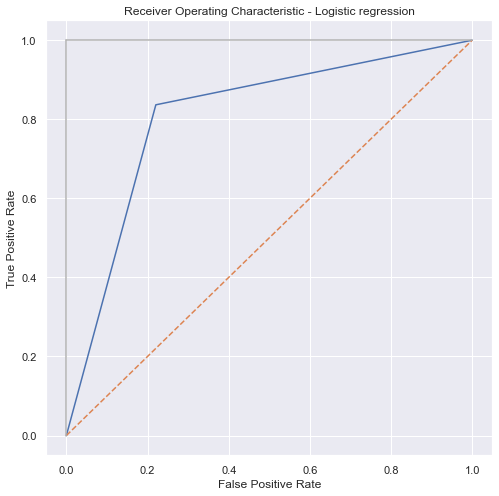

In [68]:
# Create the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_score = logistic_classifier.predict(X_test)

# Bring in the value of False Positive Rate and True Positive Rate
fp, tp, threshold = roc_curve(y_test,y_score)

# plot the curve
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fp, tp)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()